In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Observations:-
### Firstly we observe the dataset: 

- Gender : Wheather the customer is male or female
- SeniorCitizen : Whether the customer is old (1, 0)
- Partner : Whether the customer has a partner (Yes, No)
- Dependents : Whether the customer has dependents (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has telephone service (Yes, No)
- MultipleLines : Whether the customer has more than one line (Yes, No, No phone service)
- InternetService : Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security (Yes, No, no Internet service)
- OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service)
- DeviceProtection : Whether the customer has device protection (Yes, No, no Internet service)
- TechSupport : Whether the customer has technical support (Yes, No, no Internet service)
- StreamingTV : Whether the customer has a TV broadcast (Yes, No, no Internet service)
- StreamingMovies : Whether the customer has streaming movies (Yes, No, no Internet service)
- Contract : Customer's contract duration (Month to month, One year, Two years)
- PaperlessBilling : Whether the customer has a paperless invoice (Yes, No)
- PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Amount collected from the customer on a monthly basis
- TotalCharges : Total amount charged from customer
- Churn : Whether the customer is using (Yes or No)




In [4]:
df.drop(columns=['customerID'],inplace=True)

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 20)

### We have 7043 rows and 20 columns

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Most of the features are having object type values .we will use encoding techniques to handles this situation.

In [9]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# totalcharges are filled with mean
df['TotalCharges']=df['TotalCharges'].fillna(df["TotalCharges"].mean())


In [14]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df["SeniorCitizen"]= df["SeniorCitizen"].replace({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# print all the datatypes and unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

gender:['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------------------------------------------------------
SeniorCitizen:['No' 'Yes']
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
---------------------------------------------------------------------------------
Partner:['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------------------------------------
Dependents:['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------------------------------------
PhoneService:['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
---------------------------------------------------------------------------------
MultipleLines:['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
---------------------------------

## Checking Duplicates

In [17]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
964     Male            No      No         No       1          Yes   
1338    Male            No      No         No       1          Yes   
1491  Female            No      No         No       1          Yes   
1739    Male            No      No         No       1          Yes   
1932    Male            No      No         No       1          Yes   
2713    Male            No      No         No       1          Yes   
2892    Male            No      No         No       1          Yes   
3301  Female           Yes      No         No       1          Yes   
3754    Male            No      No         No       1          Yes   
4098    Male            No      No         No       1          Yes   
4476  Female            No      No         No       1          Yes   
5506    Male            No      No         No       1          Yes   
5736    Male            No      No         No       1          Yes   
5759  Female        

In [18]:
# let's drop the duplicates
df.drop_duplicates(inplace = True)

In [19]:
df.shape

(7021, 20)

# EDA

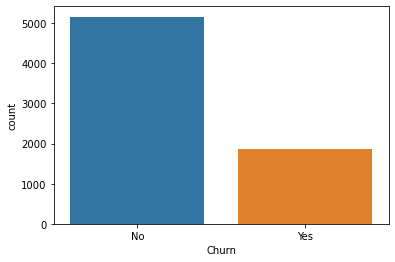

In [20]:
# let's visualize the Churn 
sns.countplot(df['Churn'])
plt.show()

In [21]:
print(df['Churn'].value_counts())

No     5164
Yes    1857
Name: Churn, dtype: int64


In [22]:
(5164/7021)*100

73.55077624270046

### 73% of customers are stayed

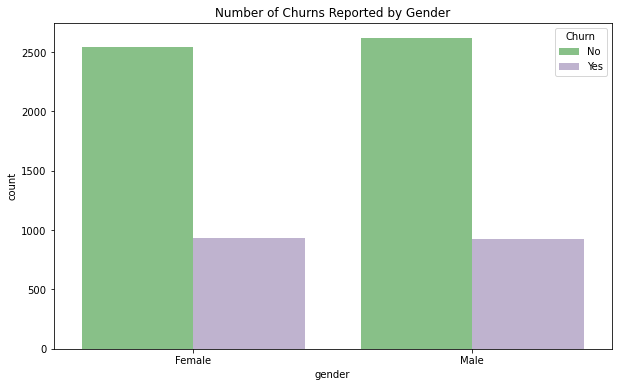

In [97]:
#let's visualize the relationship between Gender and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['gender'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by Gender")
plt.show()

In [98]:
df.groupby('gender')['Churn'].value_counts()


gender  Churn
Female  No       2546
        Yes       934
Male    No       2618
        Yes       923
Name: Churn, dtype: int64

### There's almost to null differences between the people who churned, as both men and women are churn in equal ratio.

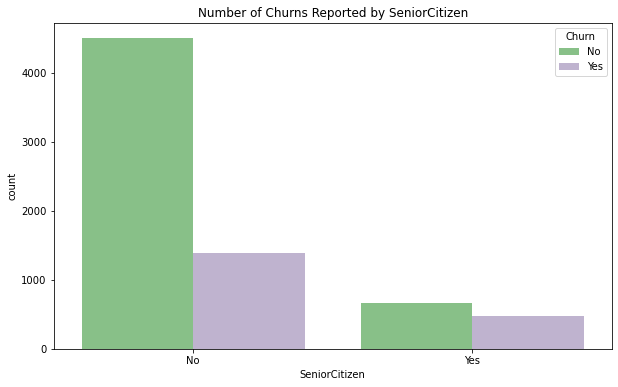

In [99]:
#let's visualize the relationship between SeniorCitizen and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['SeniorCitizen'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by SeniorCitizen")
plt.show()

In [100]:
df.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
No             No       4498
               Yes      1382
Yes            No        666
               Yes       475
Name: Churn, dtype: int64

### Eventhough the observed fraction of senior citizen is very less, most of the senior citizens churn.


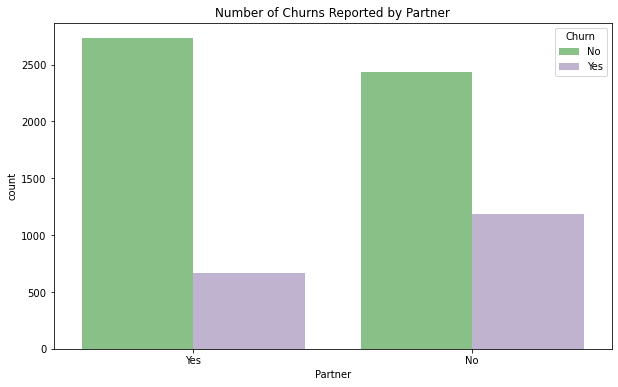

In [101]:
#let's visualize the relationship between Partner and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['Partner'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by Partner")
plt.show()

In [102]:
df.groupby('Partner')['Churn'].value_counts()


Partner  Churn
No       No       2431
         Yes      1188
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

### Customers who have a Partner churned less as compared to those hav'nt a Partner.


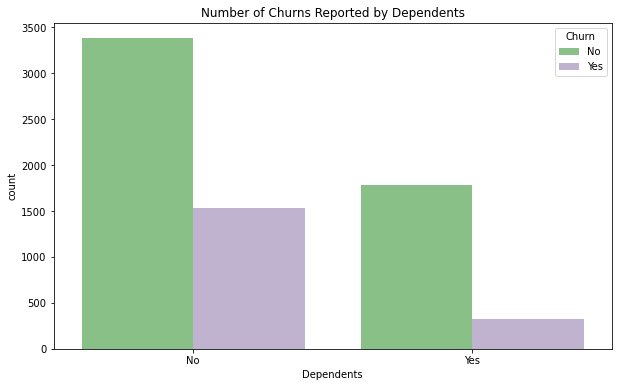

In [103]:
#let's visualize the relationship between Dependents and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['Dependents'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by Dependents")
plt.show()

In [104]:
df.groupby('Dependents')['Churn'].value_counts()


Dependents  Churn
No          No       3380
            Yes      1531
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

### Customers without dependents are more likely to churn


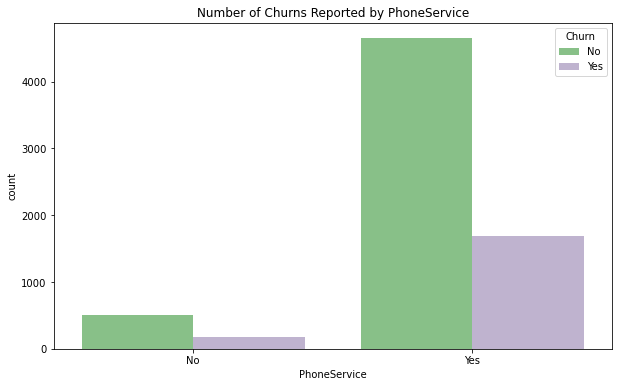

In [105]:
#let's visualize the relationship between PhoneService and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['PhoneService'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by PhoneService")
plt.show()

In [106]:
df.groupby('PhoneService')['Churn'].value_counts()


PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4652
              Yes      1687
Name: Churn, dtype: int64

### Eventhough there's a small fraction of customers but it's better to point out as they are more likely to churn because don't have a phone service.


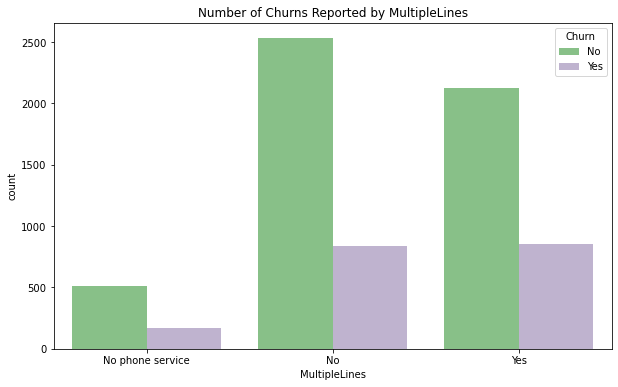

In [107]:
#let's visualize the relationship between MultipleLines and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['MultipleLines'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by MultipleLines")
plt.show()

In [108]:
df.groupby('MultipleLines')['Churn'].value_counts()


MultipleLines     Churn
No                No       2531
                  Yes       837
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

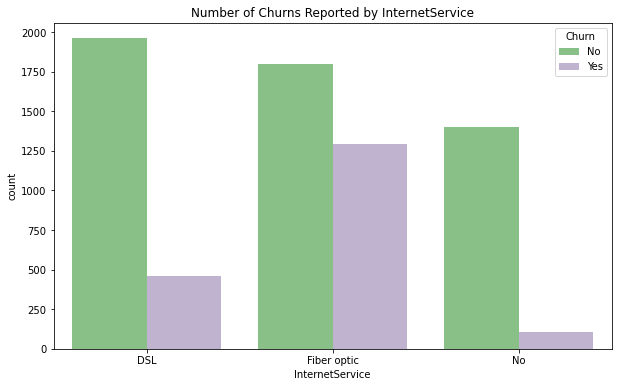

In [109]:
#let's visualize the relationship between InternetService and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['InternetService'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by InternetService")
plt.show()

In [110]:
df.groupby('InternetService')['Churn'].value_counts()


InternetService  Churn
DSL              No       1962
                 Yes       457
Fiber optic      No       1799
                 Yes      1291
No               No       1403
                 Yes       109
Name: Churn, dtype: int64

### Customers who opted for DSL service are larger in number and is found to have less churn rate compared to Fibre optic service


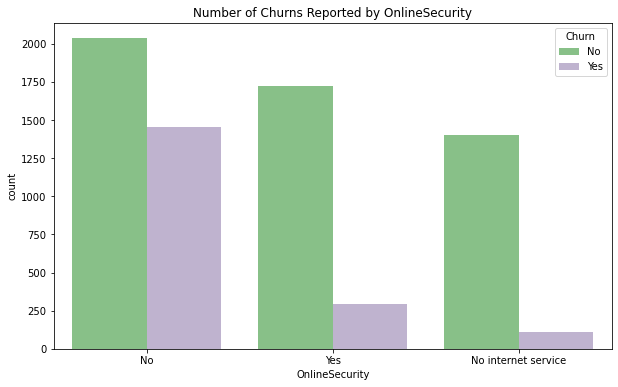

In [111]:
#let's visualize the relationship between OnlineSecurity and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['OnlineSecurity'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by OnlineSecurity")
plt.show()

In [112]:
df.groupby('OnlineSecurity')['Churn'].value_counts()


OnlineSecurity       Churn
No                   No       2037
                     Yes      1453
No internet service  No       1403
                     Yes       109
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

### Absence of online security,makes most customers churn.


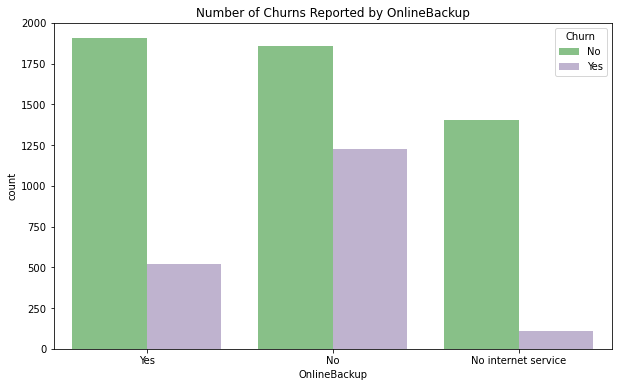

In [113]:
#let's visualize the relationship between OnlineBackup and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['OnlineBackup'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by OnlineBackup")
plt.show()

In [114]:
df.groupby('OnlineBackup')['Churn'].value_counts()


OnlineBackup         Churn
No                   No       1855
                     Yes      1225
No internet service  No       1403
                     Yes       109
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

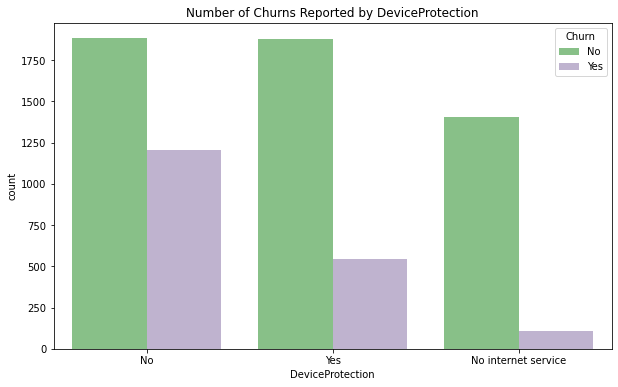

In [115]:
#let's visualize the relationship between DeviceProtection and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['DeviceProtection'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by DeviceProtection")
plt.show()

In [116]:
df.groupby('DeviceProtection')['Churn'].value_counts()


DeviceProtection     Churn
No                   No       1884
                     Yes      1203
No internet service  No       1403
                     Yes       109
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

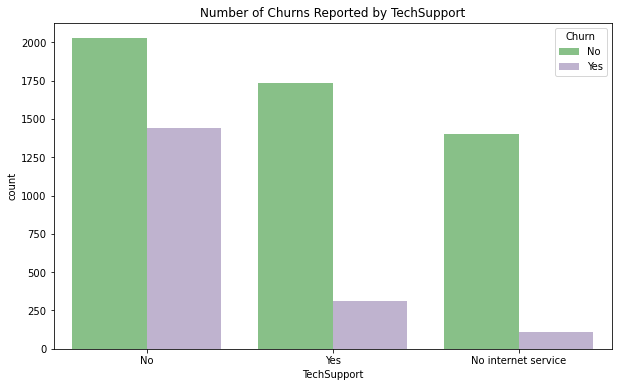

In [117]:
#let's visualize the relationship between TechSupport and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['TechSupport'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by TechSupport")
plt.show()

In [118]:
df.groupby('TechSupport')['Churn'].value_counts()


TechSupport          Churn
No                   No       2027
                     Yes      1438
No internet service  No       1403
                     Yes       109
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

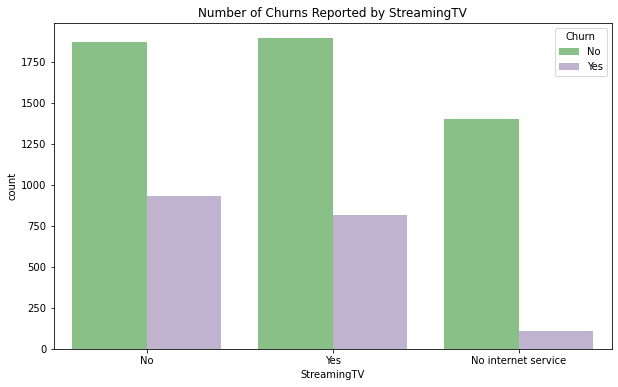

In [119]:
#let's visualize the relationship between StreamingTV and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['StreamingTV'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by StreamingTV")
plt.show()

In [120]:
df.groupby('StreamingTV')['Churn'].value_counts()

StreamingTV          Churn
No                   No       1868
                     Yes       934
No internet service  No       1403
                     Yes       109
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

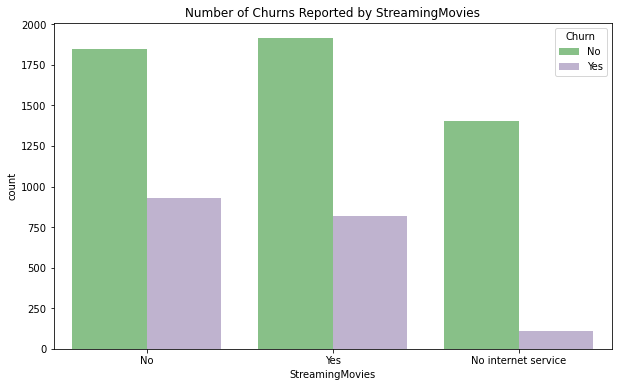

In [121]:
#let's visualize the relationship between StreamingMovies and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['StreamingMovies'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by StreamingMovies")
plt.show()

In [122]:
df.groupby('StreamingMovies')['Churn'].value_counts()

StreamingMovies      Churn
No                   No       1847
                     Yes       930
No internet service  No       1403
                     Yes       109
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64

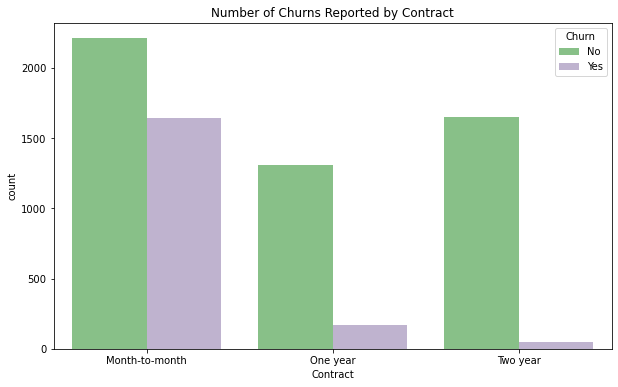

In [123]:
#let's visualize the relationship between Contract and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['Contract'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by Contract")
plt.show()

In [124]:
df.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2210
                Yes      1643
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64

### Customers who pay monthly have a higher churn rate.


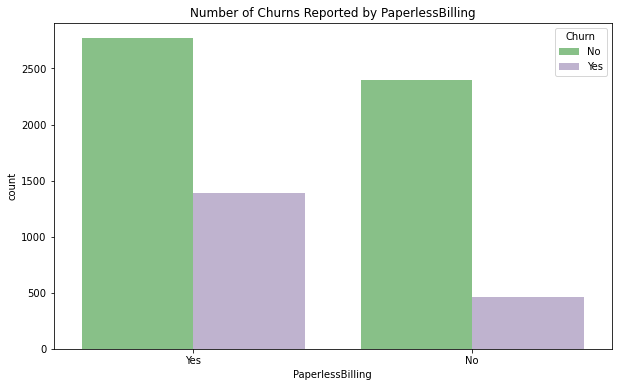

In [125]:
#let's visualize the relationship between PaperlessBilling and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['PaperlessBilling'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by PaperlessBilling")
plt.show()

In [126]:
df.groupby('PaperlessBilling')['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2394
                  Yes       466
Yes               No       2770
                  Yes      1391
Name: Churn, dtype: int64

### Paperless Billing seems like one the reasons because of which customers are most likely to churn.


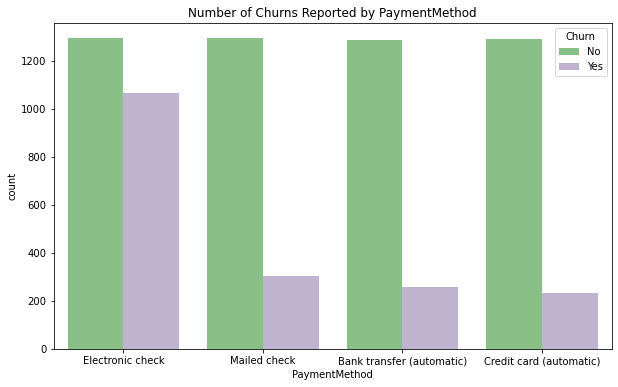

In [127]:
#let's visualize the relationship between PaymentMethod and Churn
plt.figure(figsize=(10,6))
sns.countplot(x=df['PaymentMethod'],hue='Churn',data=df, palette = 'Accent').set_title("Number of Churns Reported by PaymentMethod")
plt.show()

In [128]:
df.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1065
Mailed check               No       1294
                           Yes       302
Name: Churn, dtype: int64

### Majority of the customers who moved out were having Electronic Check as Payment Method and others who opted for Credit-Card automatic transfer / Bank Automatic Transfer and Mailed Check as Payment Method were less likely to switch.


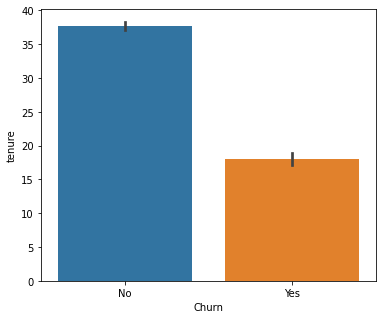

In [26]:
# let's visualize the relationship between Churn and tenure
plt.figure(figsize = (6,5))
sns.barplot(x='Churn',y = 'tenure',data = df)
plt.show()

<Figure size 432x360 with 0 Axes>

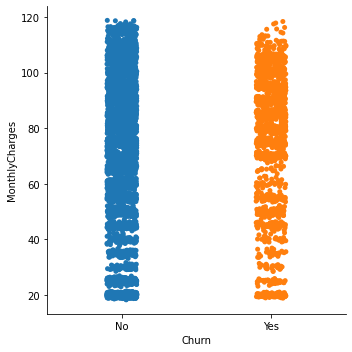

In [130]:
# let's visualize the relationship between Churn and MonthlyCharges
plt.figure(figsize = (6,5))
sns.catplot(x='Churn',y = 'MonthlyCharges',data = df)
plt.show()

<Figure size 432x360 with 0 Axes>

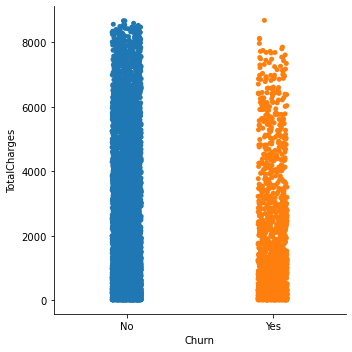

In [131]:
# let's visualize the relationship between Churn and TotalCharges
plt.figure(figsize = (6,5))
sns.catplot(x='Churn',y = 'TotalCharges',data = df)
plt.show()

In [132]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [133]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [134]:
df.shape

(7021, 20)

In [135]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.943455,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,64.851894,2290.342338,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.948575,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,30.069001,2265.044153,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,411.150000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1410.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


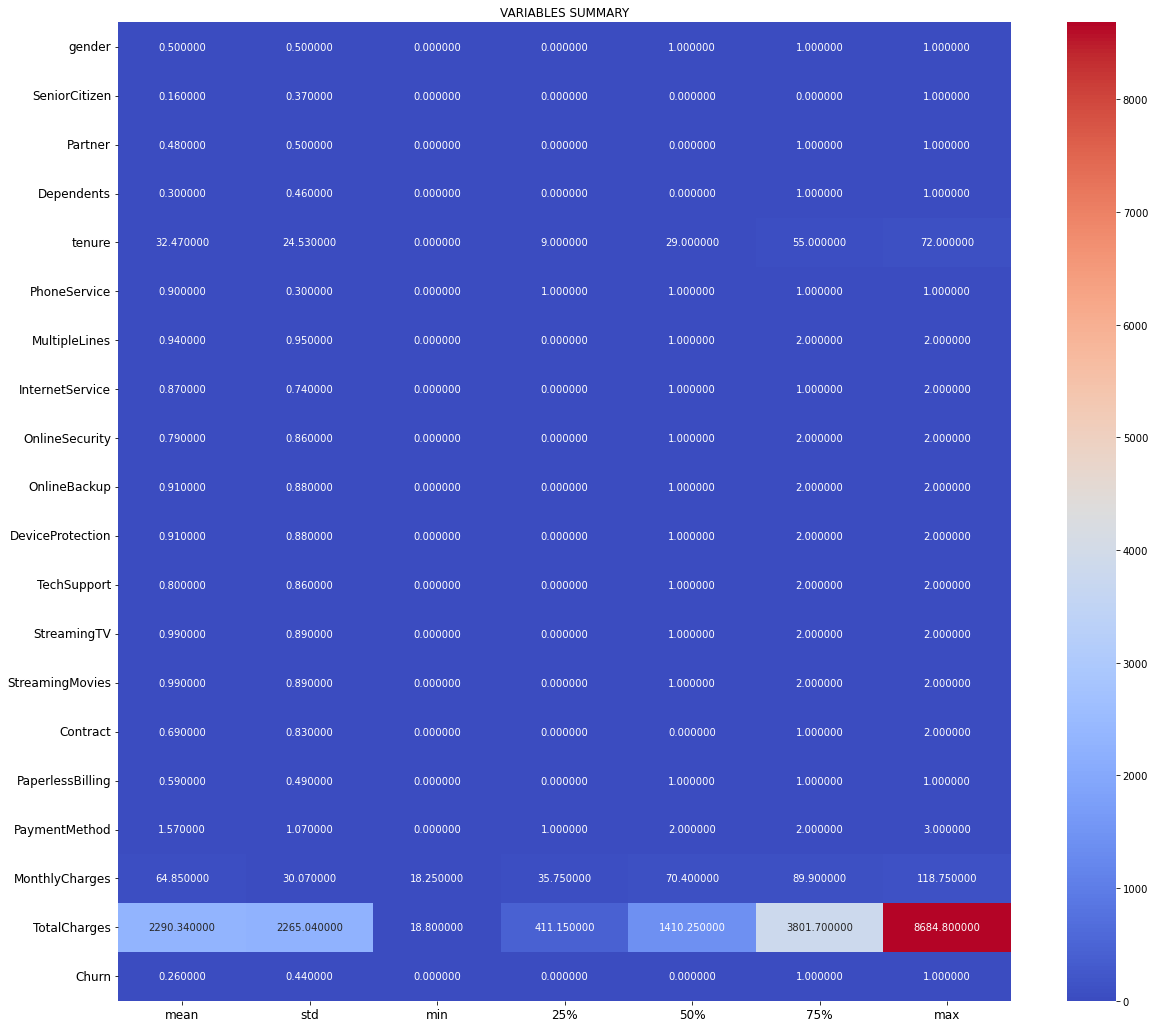

In [136]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

### Observations:-
- In variable summery TotalCharges indicating the presence of outliers

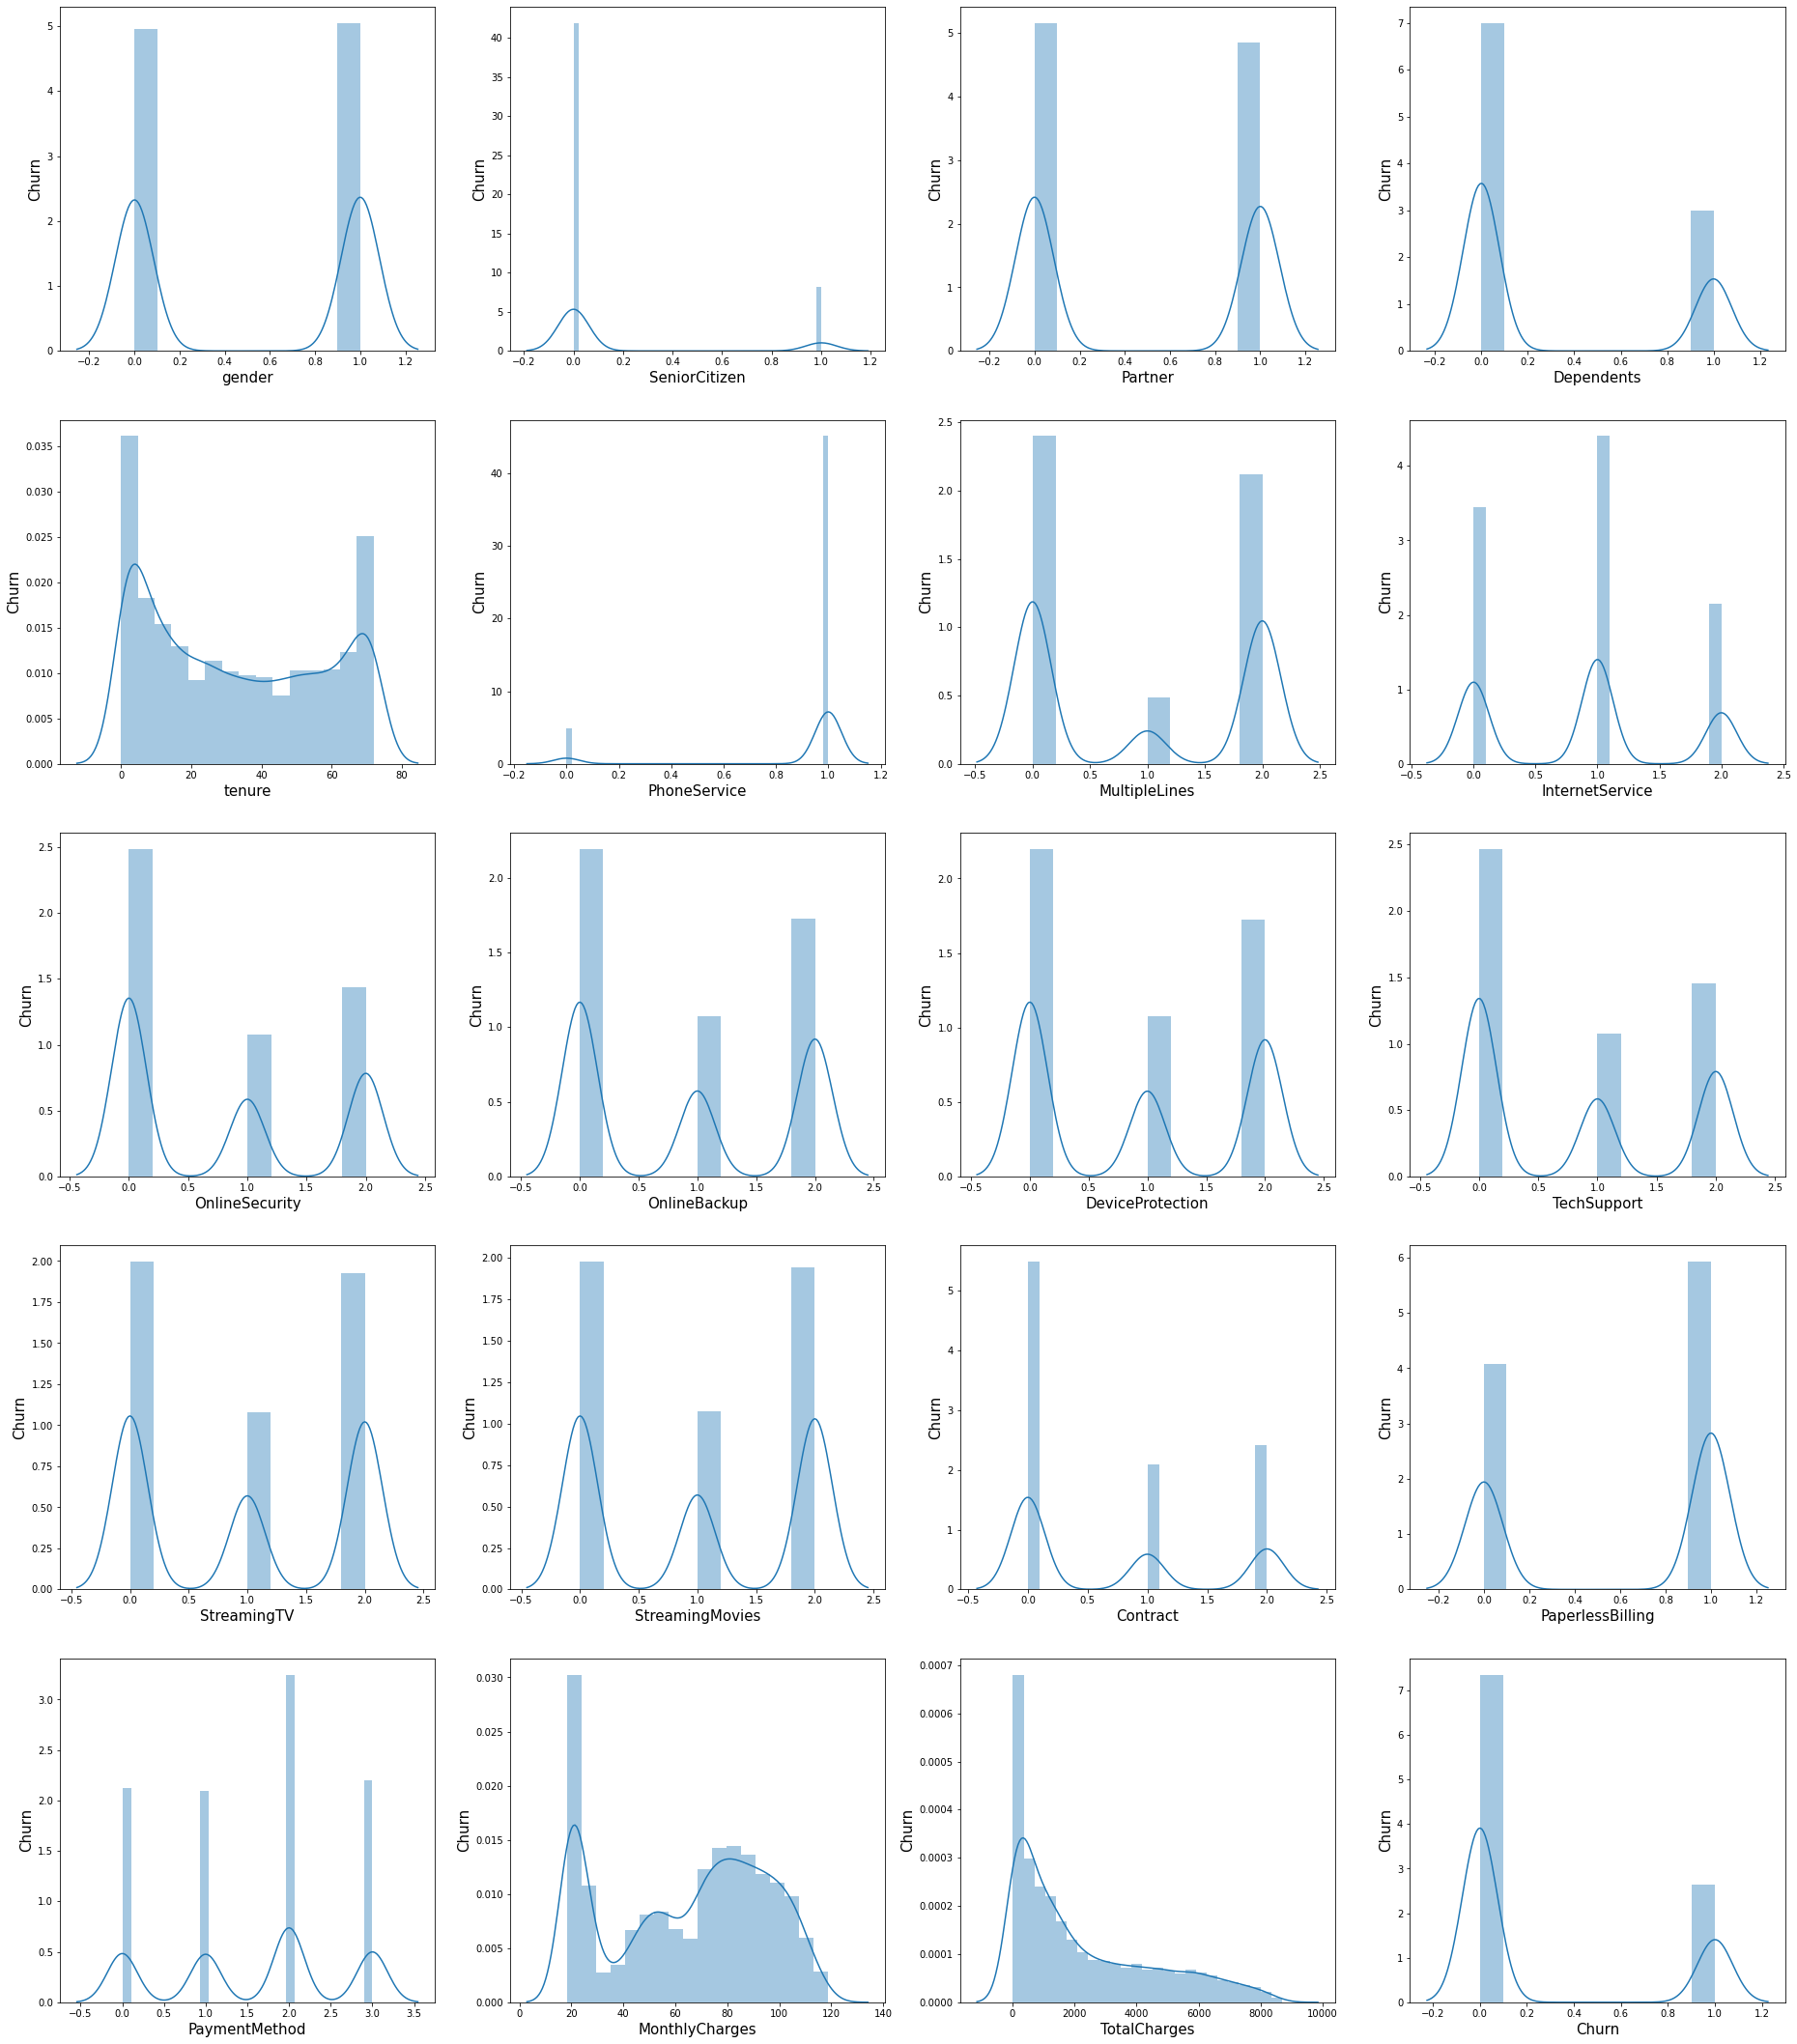

In [137]:
# let's visualize the data using distribution plot
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 20:
        ax = plt.subplot(5,4,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Churn',fontsize = 15)
    pn +=1
plt.show()    

### most of the features are having categorical values and data is normally distributed.

### Checking Outliers

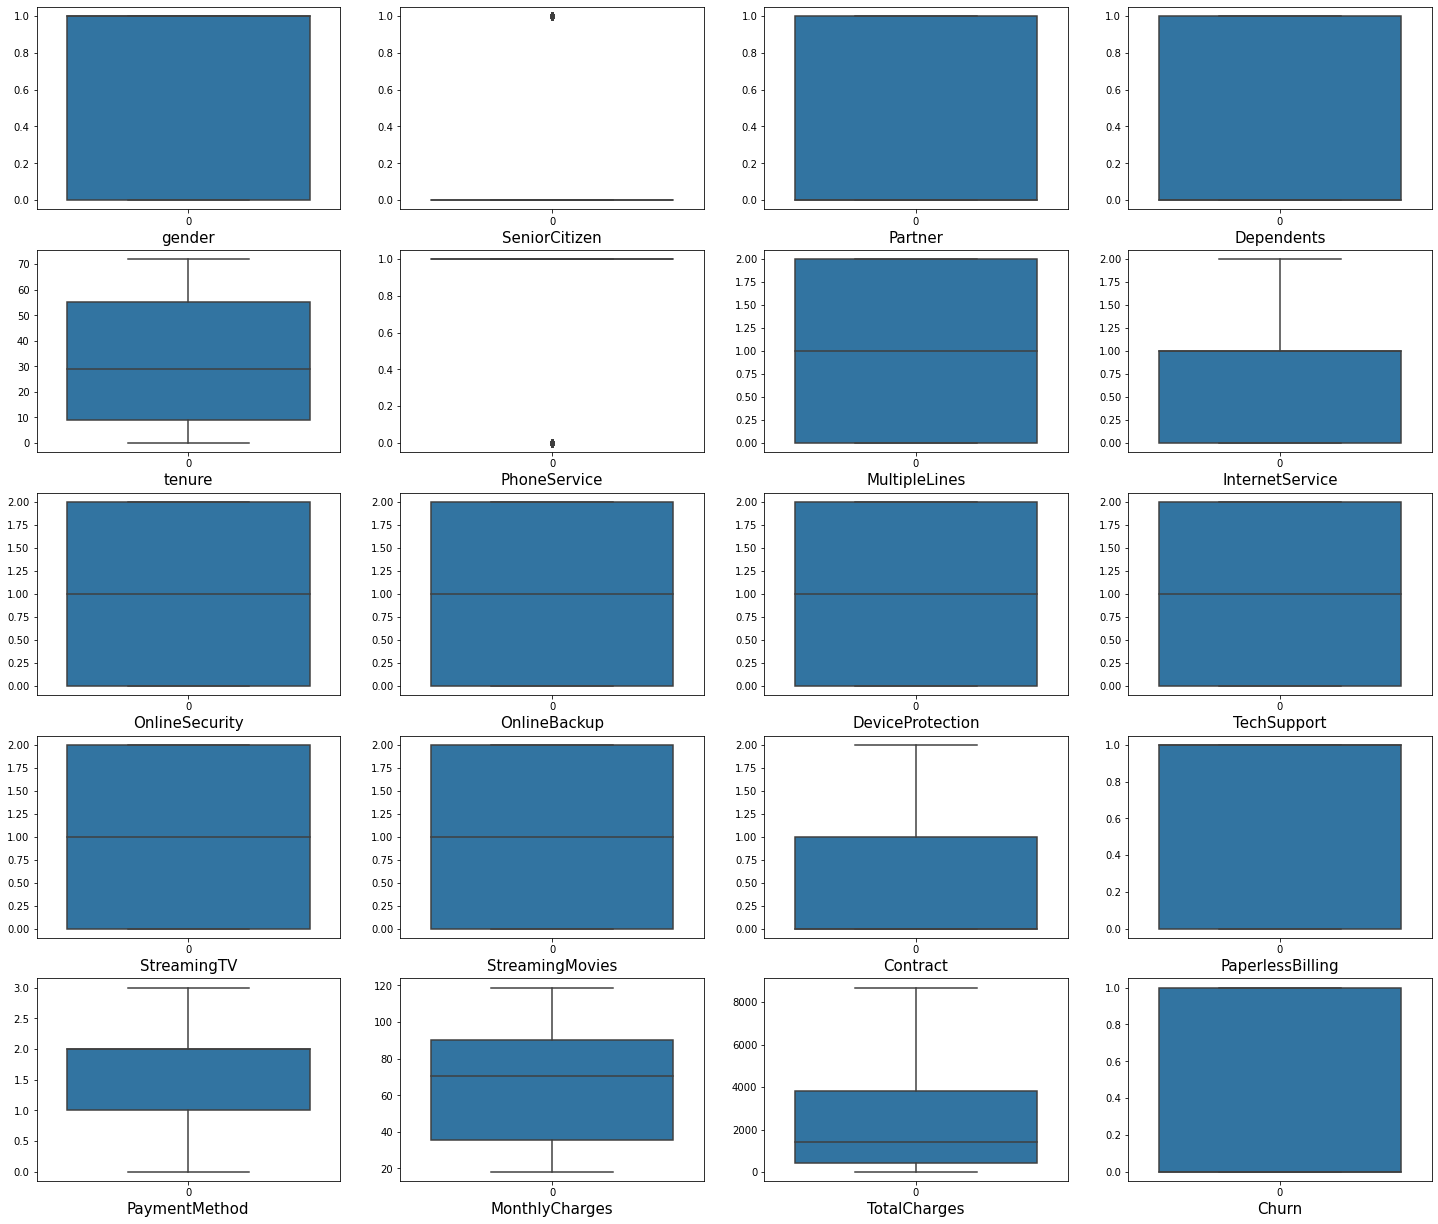

In [140]:
plt.figure(figsize=(25,35))
pn = 1
for col in df:
    if pn <= 31:
        ax = plt.subplot(8,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()        

### there is no outliers present in this dataset

## Correlation

In [141]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,0.000878,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.101628,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.316758,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.062640,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.824164,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.114064,0.011323
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.451191,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.173281,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.254298,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.375233,-0.194214


In [143]:
# let's check the correation with Churn
df.corr()['Churn'].sort_values()


Contract           -0.396531
tenure             -0.351508
OnlineSecurity     -0.288505
TechSupport        -0.281654
TotalCharges       -0.198303
OnlineBackup       -0.194214
DeviceProtection   -0.176770
Dependents         -0.163459
Partner            -0.149135
InternetService    -0.047366
StreamingMovies    -0.036492
StreamingTV        -0.034591
gender             -0.008763
PhoneService        0.011323
MultipleLines       0.040175
PaymentMethod       0.106238
SeniorCitizen       0.151619
PaperlessBilling    0.190891
MonthlyCharges      0.194508
Churn               1.000000
Name: Churn, dtype: float64

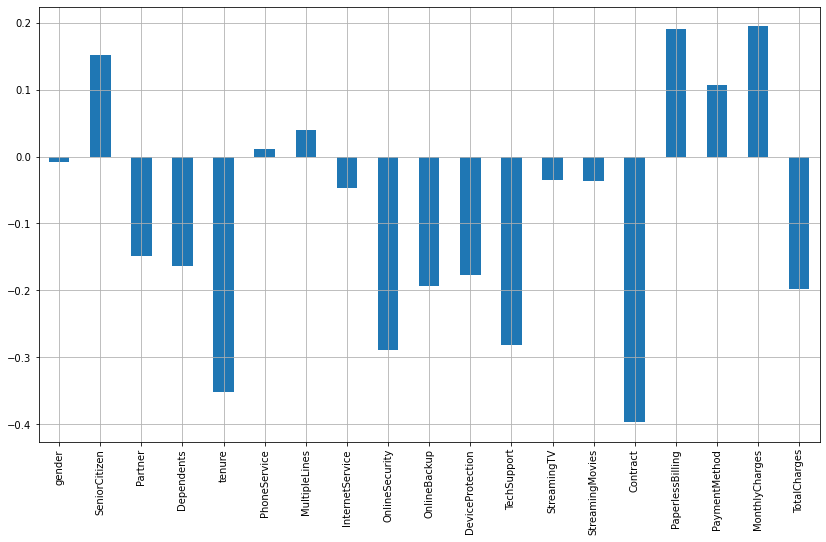

In [144]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

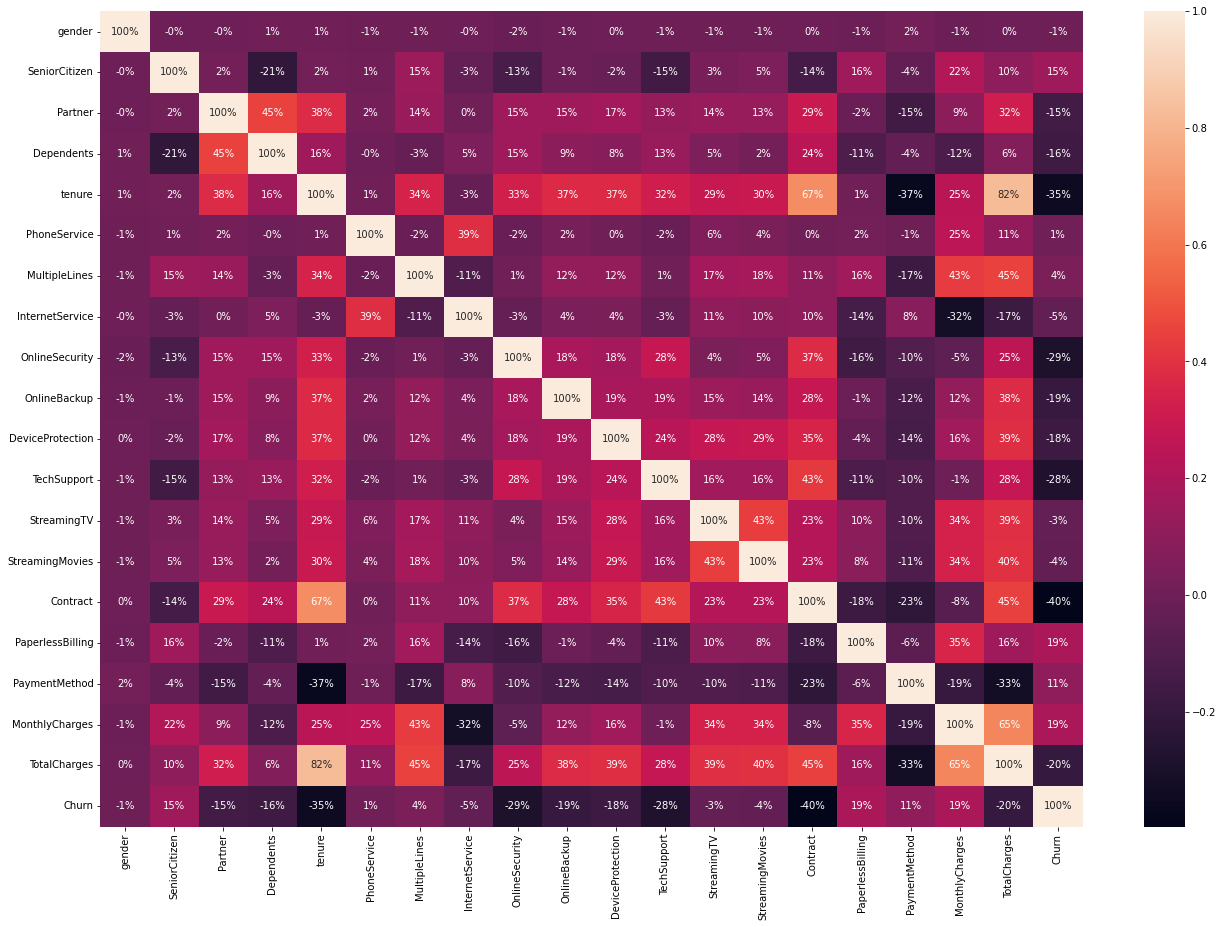

In [145]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- gender,partner,tenure,online_security,internetservice,onlinebackup,deviceprotection,contact,totalcharges are negatively correlated with target.            
-  seniorcitizen,phoneservice,multiplelines,pymentmethod,monthlycharges are positively correlated with target variable
- tenure and totalcharges  are highly correlated.
- maximum correlation : monthlycharges
- minimum correlation : phoneservice                              


In [154]:
df.drop(columns=['tenure'],inplace=True)

## Dividing data in features and label

In [155]:
x = df.drop('Churn',axis = 1)
x.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [156]:
y=df['Churn']

## Skewness


In [157]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959088
Churn               1.068139
dtype: float64

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [158]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-3.048725,0.327813,-1.251136,-0.976532,1.160516,-1.076686,-0.982579,-1.151479,-1.158219,-0.890813,0.829057,0.413996,-1.162582,-1.821579
1,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-1.017987,-1.251136,1.257699,-1.078481,1.162125,-0.982579,-1.151479,-1.158219,0.785228,-1.206190,1.321795,-0.244169,0.248197
2,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-1.017987,-1.251136,1.257699,1.160516,-1.076686,-0.982579,-1.151479,-1.158219,-0.890813,0.829057,1.321795,-0.347413,-1.397518
3,0.991349,-0.440508,-0.969556,-0.655475,-3.048725,0.327813,-1.251136,1.257699,-1.078481,1.162125,1.251593,-1.151479,-1.158219,0.785228,-1.206190,-1.488291,-0.735799,0.227054
4,-1.008726,-0.440508,-0.969556,-0.655475,0.328006,-1.017987,0.293947,-0.976532,-1.078481,-1.076686,-0.982579,-1.151479,-1.158219,-0.890813,0.829057,0.413996,0.209512,-1.260061
5,-1.008726,-0.440508,-0.969556,-0.655475,0.328006,1.078766,0.293947,-0.976532,-1.078481,1.162125,-0.982579,1.097906,1.092392,-0.890813,0.829057,0.413996,1.146598,-0.361499
6,0.991349,-0.440508,-0.969556,1.525611,0.328006,1.078766,0.293947,-0.976532,1.160516,-1.076686,-0.982579,1.097906,-1.158219,-0.890813,0.829057,-0.517924,0.807556,0.273625
7,-1.008726,-0.440508,-0.969556,-0.655475,-3.048725,0.327813,-1.251136,1.257699,-1.078481,-1.076686,-0.982579,-1.151479,-1.158219,-0.890813,-1.206190,1.321795,-1.166052,-0.939927
8,-1.008726,-0.440508,1.031400,-0.655475,0.328006,1.078766,0.293947,-0.976532,-1.078481,1.162125,1.251593,1.097906,1.092392,-0.890813,0.829057,0.413996,1.311210,0.660333
9,0.991349,-0.440508,-0.969556,1.525611,0.328006,-1.017987,-1.251136,1.257699,1.160516,-1.076686,-0.982579,-1.151479,-1.158219,0.785228,-1.206190,-1.488291,-0.270776,0.786687


In [159]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.00872629, -0.44050836,  1.03140002, ...,  0.41399589,
        -1.1625821 , -1.82157888],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.32179544,
        -0.24416903,  0.24819658],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.32179544,
        -0.34741318, -1.39751816],
       ...,
       [-1.00872629, -0.44050836,  1.03140002, ...,  0.41399589,
        -1.17125924, -0.8688257 ],
       [ 0.9913492 ,  2.27010445,  1.03140002, ...,  1.32179544,
         0.33053397, -0.93207197],
       [ 0.9913492 , -0.44050836, -0.96955592, ..., -1.48829075,
         1.33832604,  1.48467182]])

In [160]:
pd.DataFrame(x).skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.259855
PaymentMethod      -0.206316
TotalCharges       -0.143822
StreamingMovies    -0.106539
StreamingTV        -0.098052
InternetService    -0.071493
gender             -0.017381
OnlineBackup       -0.001635
DeviceProtection    0.000849
MultipleLines       0.028603
Partner             0.061857
TechSupport         0.140414
OnlineSecurity      0.150084
Contract            0.297934
Dependents          0.870322
SeniorCitizen       1.829987
dtype: float64

## Final features Multi-Collinearity Check using VIF**


In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,gender,1.001555
1,SeniorCitizen,1.149570
2,Partner,1.451379
3,Dependents,1.378279
4,PhoneService,1.616986
5,MultipleLines,1.396360
6,InternetService,1.708243
7,OnlineSecurity,1.333005
8,OnlineBackup,1.203161
9,DeviceProtection,1.307363


### There is no sign of Multi-collinearity

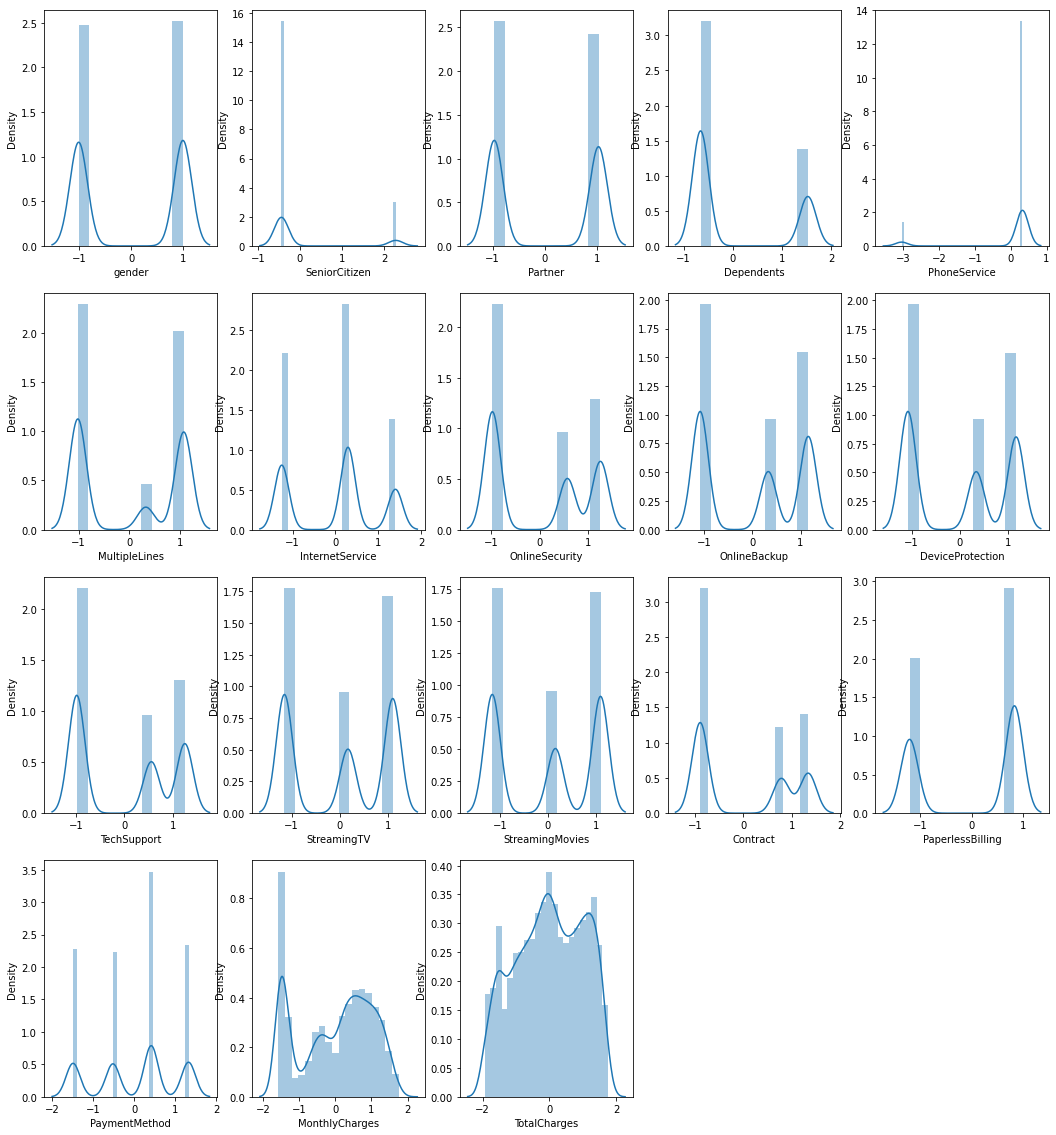

In [162]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=18:
        plt.subplot(4,5,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model Building


In [163]:
# lets import all necessary libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

## Best Random State

In [194]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.7587188612099645 on Random State 82


In [182]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [195]:
# classification model Function
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 82)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)

    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x,y,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)
    
    # Confusion_matrix
    
    plt.figure(figsize=(4,3))
    print("\n\n",sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt = "d",linecolor="k",linewidths=3))
    plt.title("CONFUSION MATRIX",fontsize=14)
    plt.show()


## Logistic regression


Accuracy score 83.34519572953737

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1067
           1       0.68      0.58      0.63       338

    accuracy                           0.83      1405
   macro avg       0.78      0.75      0.76      1405
weighted avg       0.83      0.83      0.83      1405

Cross validation score 80.71504504340328

 Accuracy score - cross val score is: 2.630150686134087


 AxesSubplot(0.125,0.125;0.62x0.755)


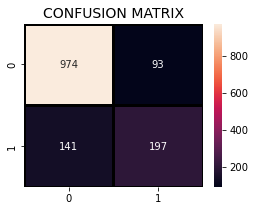

In [184]:
model=LogisticRegression()
classify(model,x,y)

### After setting the random state = 419 , We got the accuracy score is 83%


## KNN

Accuracy score 79.00355871886121

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1058
           1       0.58      0.55      0.56       347

    accuracy                           0.79      1405
   macro avg       0.72      0.71      0.71      1405
weighted avg       0.79      0.79      0.79      1405

Cross validation score 75.57320236424714

 Accuracy score - cross val score is: 3.4303563546140765


 AxesSubplot(0.125,0.125;0.62x0.755)


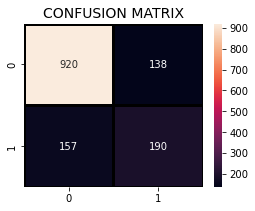

In [187]:
model = KNeighborsClassifier()
classify(model,x,y)

### After setting the random state = 344 , We got the accuracy score is 79%


## Random Forest

Accuracy score 80.0

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1067
           1       0.60      0.51      0.55       338

    accuracy                           0.80      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.79      0.80      0.79      1405

Cross validation score 78.53558823708079

 Accuracy score - cross val score is: 1.4644117629192124


 AxesSubplot(0.125,0.125;0.62x0.755)


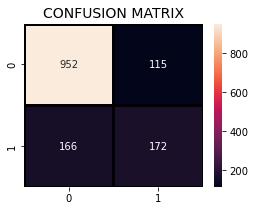

In [190]:
model =RandomForestClassifier()
classify(model,x,y)

### After setting the random state = 419, We got the accuracy score is 80%


## AdaBoost


Accuracy score 82.98932384341637

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1057
           1       0.69      0.57      0.62       348

    accuracy                           0.83      1405
   macro avg       0.78      0.74      0.76      1405
weighted avg       0.82      0.83      0.82      1405

Cross validation score 80.28754275022932

 Accuracy score - cross val score is: 2.7017810931870514


 AxesSubplot(0.125,0.125;0.62x0.755)


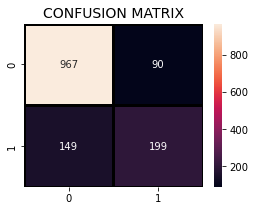

In [193]:
model=AdaBoostClassifier()
classify(model,x,y)

### After setting the random state = 475 , We got the accuracy score is 83%


## Decision tree

Accuracy score 74.80427046263345

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1010
           1       0.55      0.55      0.55       395

    accuracy                           0.75      1405
   macro avg       0.69      0.69      0.69      1405
weighted avg       0.75      0.75      0.75      1405

Cross validation score 72.11202838068512

 Accuracy score - cross val score is: 2.6922420819483364


 AxesSubplot(0.125,0.125;0.62x0.755)


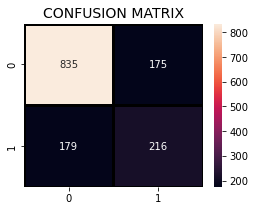

In [196]:
model=DecisionTreeClassifier()
classify(model,x,y)

### After setting the random state = 82 , We got the accuracy score is 75%


## Compare the models


In [197]:
# create a list of labels of build models
label = ['LogisticRegression','KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)

['LogisticRegression', 'KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[83.34519572953737, 79.00355871886121, 80.0, 82.98932384341637, 74.80427046263345]
[80.71504504340328, 75.57320236424714, 78.53558823708079, 80.28754275022932, 72.11202838068512]
[2.630150686134087, 3.4303563546140765, 1.4644117629192124, 2.7017810931870514, 2.6922420819483364]


In [198]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,LogisticRegression,83.345196,80.715045,2.630151
1,KNN,79.003559,75.573202,3.430356
2,Random Forest,80.000000,78.535588,1.464412
3,AdaBoost,82.989324,80.287543,2.701781
4,Decision Tree,74.804270,72.112028,2.692242


 ###  as per my observation , I choose Random Forest as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING OF FINAL MODEL


In [199]:
rf = RandomForestClassifier()

In [200]:
params = {
    'n_estimators':[100],
    'n_jobs':[50,60],
    'max_depth':[15,19],
    'criterion':['entropy','gini'],
    'random_state':[30,40,50],
    'min_samples_leaf':[2,4,3]       }

In [201]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [15, 19], 'min_samples_leaf': [2, 4, 3],
                         'n_estimators': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [202]:
rf = grd.best_estimator_
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=19, min_samples_leaf=4, n_jobs=50,
                       random_state=50)

In [207]:
pred = rf.predict(x_test)
accuracy_score(y_test,pred)

0.79644128113879

## ROC AUC Curve

In [204]:
from sklearn.metrics import plot_roc_curve

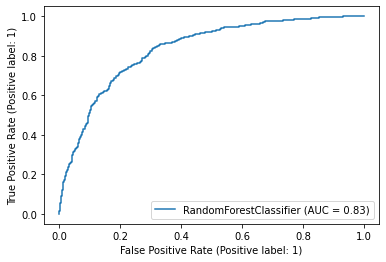

In [205]:
plot_roc_curve(rf,x_test,y_test)
plt.show()

# Save the final model


In [206]:
import joblib
joblib.dump(rf,'Customer Churn.pkl')

['Customer Churn.pkl']

# Model is completed